In [1]:
import os

from glob import glob

import numpy as np

import itk

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

from ARGUS_pnb_ar_inference import ARGUS_pnb_ar_inference
from ARGUS_pnb_roi_inference import ARGUS_pnb_roi_inference

In [2]:
pnb_ar = ARGUS_pnb_ar_inference(config_file_name="../ARGUS/ARGUS_pnb_ar.cfg", network_name="final", device_num=0)
pnb_roi = ARGUS_pnb_roi_inference()

In [3]:
pnb_ar_best_models = [[0,8], [1,0], [2,7]]
pnb_ar.num_models = len(pnb_ar_best_models)

for i,r in enumerate(pnb_ar_best_models):
    model_name = os.path.join("Results", "pnb_vfold_run"+str(r[0]), "best_model_"+str(r[1])+".pth")
    pnb_ar.load_model(i, model_name)

In [5]:
vids = glob("Data_PNB/images/*.mp4")
vid = ARGUS_load_video(vids[0])

IndexError: list index out of range

In [27]:
print(vid.shape)

(362, 1080, 1672)


In [7]:
pnb_ar.preprocess(vid)

(12, 320, 320)
12


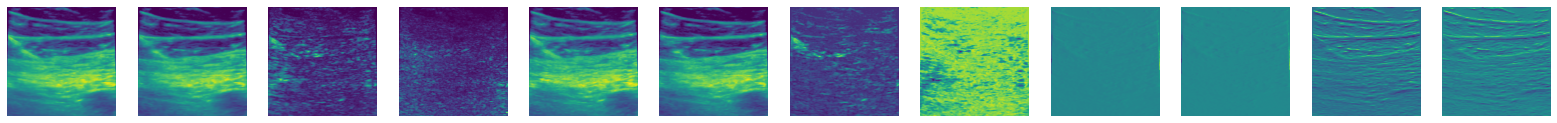

In [8]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

arr = pnb_ar.input_array
print(arr.shape)
num_channels = arr.shape[0]
print(num_channels)
plt.figure(figsize=[30, 30])
for c in range(num_channels):
    plt.subplot(
        2,
        num_channels + 1,
        (num_channels + 1) + c + 1,
    )
    plt.axis('off')
    plt.imshow(rotate(arr[c, :, :],270))
plt.show()

In [9]:
labels = pnb_ar.inference()

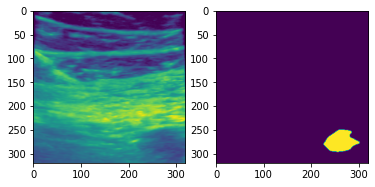

In [10]:
plt.subplot(1,2,1)
plt.imshow(rotate(arr[0],270))
plt.subplot(1,2,2)
plt.imshow(rotate(labels,270))

In [11]:
pnb_roi.inference(pnb_ar.input_image, labels)

(0, [0, 0])

Data_PNB\n1. 5 AC_Video 1.mp4
(0, [0, 0])


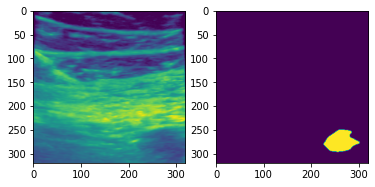

In [12]:
for vid_name in vids:
    print(vid_name)
    vid = ARGUS_load_video(vid_name)
    pnb_ar.preprocess(vid)
    arr = pnb_ar.input_array
    labels = pnb_ar.inference()
    print(pnb_roi.inference(pnb_ar.input_image, labels))
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(rotate(arr[0],270))
    plt.subplot(1,2,2)
    plt.imshow(rotate(labels,270))
    plt.show()

In [22]:
itk.imwrite(pnb_ar.preprocessed_pnb_video, vid_name[:-4]+".mha")